<a href="https://colab.research.google.com/github/sof210/sof210/blob/main/Python_Pyomo_refresher_20210803.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Jupyter notebook below contain Sof Taamallah python notes, including pyomo learning steps 

# 1.0 Python general tutorial 2023-2024


# 2.0 Solving ODEs in Python


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [ ]:
Cv  = 0.1     # Outlet valve constant [cubic meters/min/meter^1/2]
A   = 1.0     # Tank area [meter^2]

In [ ]:
# inlet flow rate in cubic meters/min
def qin(t):
    return 0.2

def deriv(h,t):
    return qin(t)/A - Cv*np.sqrt(h)/A

In [ ]:
IC = [0.0]
t = np.linspace(0,400,101)
h = odeint(deriv,IC,t)


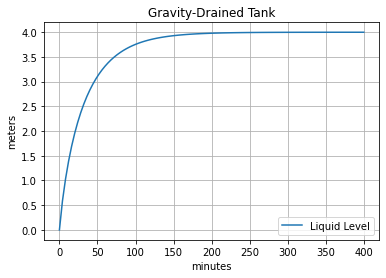

In [ ]:
plt.plot(t,h)

plt.xlabel('minutes')
plt.ylabel('meters')
plt.title('Gravity-Drained Tank')
plt.legend(['Liquid Level']);
plt.grid()

# 3.0 Optimization with Python's Pyomo


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x = np.linspace(1, 40, 40)
print(x)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40.]


In [ ]:
x = np.arange(1,41)
print(x)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


In [ ]:
from scipy.optimize import linprog

c = [-40, -30]

A_ub = [[1, 0], 
        [1, 1], 
        [2, 1]]

b_ub = [40, 
        80, 
        100]

results = linprog(c, A_ub, b_ub)

print(results.message)
if results.success:
    print('x =', results.x)
    print('objective = ', results.fun)

Optimization terminated successfully.
x = [19.99999999 59.99999998]
objective =  -2599.999998962053


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
